# 基于机器学习的径流预报

## 课程目标
#### <font color="red">整体目标</font>：能够综合利用特征工程、机器学习和集成学习等技术实现径流预报。
#### <font color="red">具体目标</font>：
- 数据分析：了解数据集，进行数据统计分析和探索性数据分析。
- 特征工程：分别实现2种特征归一化方法和2种特征选择方法。
- 机器学习：选择2种机器学习算法实现给定单个流域的径流预报，并确定预报精度最优的特征工程方法+机器学习算法组合。
- 流域聚类：要求利用1种聚类算法将水文单元中的流域划分为不同的簇。
- 空间多尺度建模：针对给定水文单元内的多个流域，分别进行分区建模和全区建模，并确定预报精度最优的特征工程方法+机器学习算法组合。
- 集成学习：使用集成学习当中的Stacking和简单平均法将2种不同机器学习模型的预报结果进行集成。
#### <font color="red">算法技能目标</font>：能够掌握相关特征工程、机器学习算法和集成学习算法。
#### <font color="red">编程技能目标</font>：能够熟练使用python编程语言进行数据的处理、分析、建模和评估。
#### <font color="red">思政目标</font>：掌握机器学习技术本领，服务于祖国和人民。

## 一、数据分析

#### 数据包括Date,Discharge,Dayl,Prcp,Srad,Swe,Tmax,Tmin,Vp字段
- Date: 日期
- Discharge: 流量
- Dayl: 每天白天的持续时间（以秒为单位）。此计算基于一天中太阳位于假设的平坦地平线上方的时间段
- Prcp: 每日总降水量（毫米）。所有形式降水的总和转换为水当量深度。
- Srad: 入射短波辐射通量密度（以瓦/平方米为单位），取一天中白天时段的平均值。注：每日总辐射量（MJ/m2/day）可计算如下：((srad (W/m2) * dayl (s/day))/l,000,000)
- Swe:  雪水当量，单位为千克每平方米。积雪中所含的水量。
- Tmax: 每日最高 2 m 气温（摄氏度）。
- Tmin: 每日最低 2 m 气温（摄氏度）。
- Vp:   水蒸气压（以帕斯卡为单位）。日平均水蒸气分压。


--------------------数据描述：--------------------
         Discharge          Dayl         Prcp         Srad     Swe  \
count  1822.000000   1822.000000  1822.000000  1822.000000  1822.0   
mean    209.216038  43216.345483     3.492448   322.935248     0.0   
std     222.645757   7098.144770     5.596613   105.339201     0.0   
min       8.585467  32967.655733     0.000000    76.345867     0.0   
25%      75.283500  36263.325333     0.058700   239.322133     0.0   
50%     143.445467  43200.000133     1.046533   320.776733     0.0   
75%     266.899333  50136.672667     4.712433   408.248733     0.0   
max    3589.406667  53432.344133    71.531333   574.893467     0.0   

              Tmax         Tmin           Vp  one_Discharge  two_Discharge  \
count  1822.000000  1822.000000  1822.000000    1822.000000    1822.000000   
mean     15.532327     4.108228   984.751138     209.210016     209.180297   
std       9.927955     9.196090   563.974375     222.646410     222.650794   
min      -

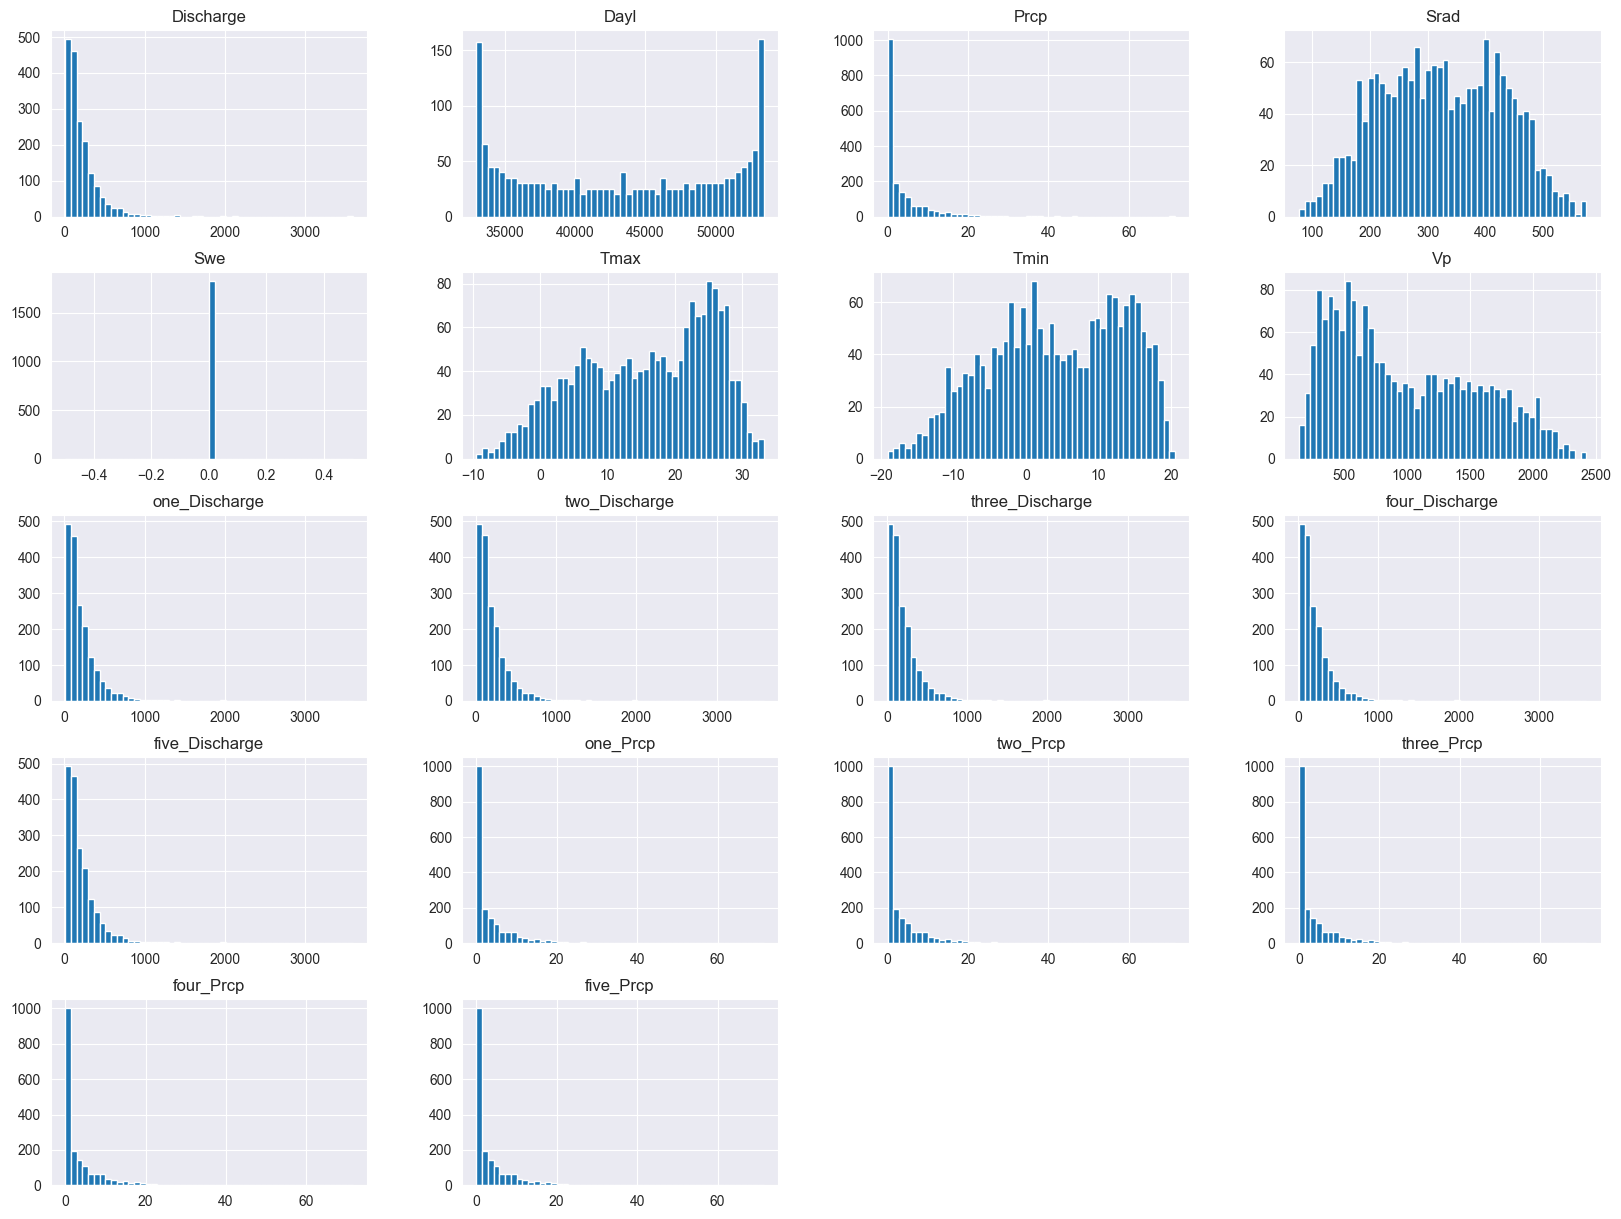

--------------------缺失值检测：--------------------
是否有缺失值： False
--------------------全为零检测：--------------------
是否有全为零的列： True
全为零的列数量： 1
全为零的列名：
Index(['Swe'], dtype='object')
是否有全为零的行： False
--------------------相关性矩阵：--------------------
                 Discharge      Dayl      Prcp      Srad  Swe      Tmax  \
Discharge         1.000000 -0.022948  0.555790 -0.126137  NaN -0.116498   
Dayl             -0.022948  1.000000  0.106966  0.655524  NaN  0.777165   
Prcp              0.555790  0.106966  1.000000 -0.372765  NaN  0.075536   
Srad             -0.126137  0.655524 -0.372765  1.000000  NaN  0.534614   
Swe                    NaN       NaN       NaN       NaN  NaN       NaN   
Tmax             -0.116498  0.777165  0.075536  0.534614  NaN  1.000000   
Tmin             -0.062558  0.771465  0.211032  0.329548  NaN  0.950519   
Vp               -0.111692  0.762152  0.207444  0.303192  NaN  0.907013   
one_Discharge     0.723065 -0.018888  0.104729  0.008273  NaN -0.136109   
two_Discharge 

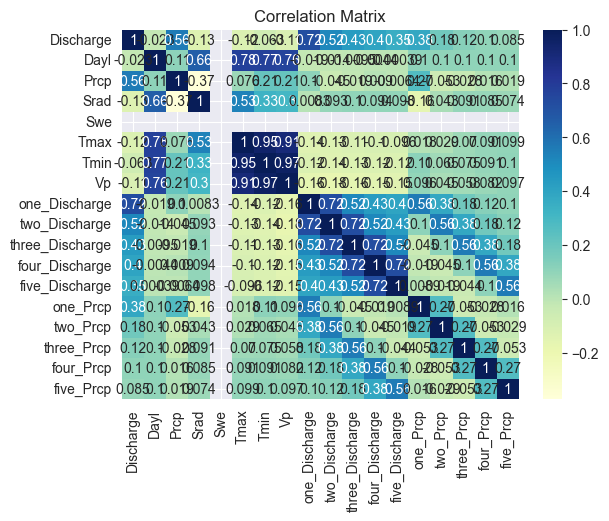

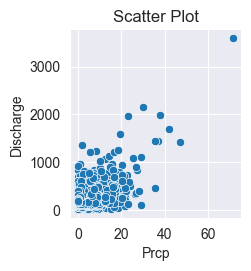

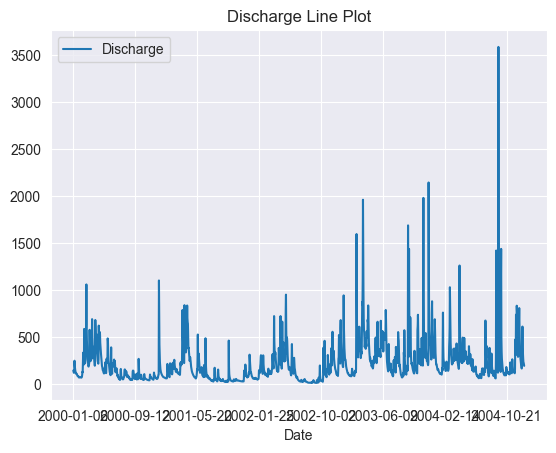

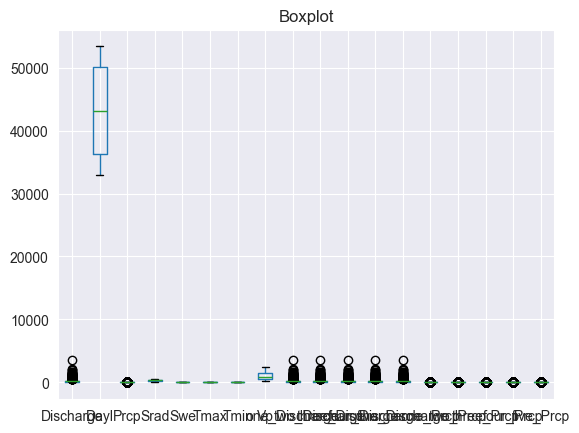

In [2]:
from utils.data_process import read_from_dataset_folders, add_5days_before

from Data_Analysis import data_analysis

data = read_from_dataset_folders(drop_Swe=False)
data = add_5days_before(data)
data_analysis(data)

## 二、特征工程
#### 我们举出了四种特征选择方法，分别是：
- 皮尔逊相关系数法
- 最大信息系数法
- 距离相关系数法
- SVM法
#### 我们举出了四种特征归一化方法，分别是：
- 最大最小归一化
- Z-score归一化
- Z-score简单归一化
- 对数归一化。

In [10]:
from utils.data_process import read_from_csv, Z_score, min_max, Z_score_simple, log_normalization

data = read_from_csv(path="./data/01333000.csv")
Z_score_data, _1, _2 = Z_score(data)
min_max_data, _1, _2 = min_max(data)
Z_score_simple_data = Z_score_simple(data)
log_data = log_normalization(data)
Z_score_data = Z_score_data.drop("Date", axis=1)
min_max_data = min_max_data.drop("Date", axis=1)
Z_score_simple_data = Z_score_simple_data.drop("Date", axis=1)
log_data = log_data.drop("Date", axis=1)
# 打印Z_score_data的均值和方差，min_max_data的最大值和最小值，Z_score_simple_data的均值和方差，log_data的最大值和最小值
print("经过Z_score归一化后得到的数据的均值和方差:")
print(Z_score_data.mean(), Z_score_data.var())
print("经过min_max归一化后得到的数据的最大值和最小值:")
print(min_max_data.max(), min_max_data.min())
print("经过Z_score_simple归一化后得到的数据的均值和方差:")
print(Z_score_simple_data.mean(), Z_score_simple_data.var())
print("经过log归一化后得到的数据的最大值和最小值:")
print(log_data.max(), log_data.min())

经过Z_score归一化后得到的数据的均值和方差:
Discharge         -0.010923
Dayl              -0.000576
Prcp              -0.001084
Srad               0.005450
Tmax               0.001648
Tmin              -0.035067
Vp                -0.028862
one_Discharge     -0.010637
two_Discharge     -0.010189
three_Discharge   -0.009555
four_Discharge    -0.008835
five_Discharge    -0.007955
one_Prcp          -0.001340
two_Prcp          -0.001234
three_Prcp        -0.001282
four_Prcp         -0.001282
five_Prcp         -0.001529
dtype: float64 Discharge          0.926348
Dayl               1.000256
Prcp               0.993259
Srad               0.991301
Tmax               1.027425
Tmin               1.038927
Vp                 0.973443
one_Discharge      0.926492
two_Discharge      0.926827
three_Discharge    0.927416
four_Discharge     0.928126
five_Discharge     0.929374
one_Prcp           0.993050
two_Prcp           0.992865
three_Prcp         0.992897
four_Prcp          0.992897
five_Prcp          0.993036
dtype: 

C:\Users\Whisper\.conda\envs\ZHXMSJ\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## 三、机器学习回归
- 近年来，随着各类机器学习算法的提出，采用机器学习方法进行中长期径流预报逐渐成为趋势。闪丽洁等在大通、屏山和汉口3个站点基于BP人工神经网络模型开展径流预报研究，模拟效果较好；郑炎辉等在新丰江水库构建了机器学习模型，开展枯水期中长期径流预报，计算结果精度较高。 预报因子筛选对于提高预报精度具有十分重要的意义。国内外众多学者在筛选预报因子时，常将历史径流和降雨等这些与流域径流密切相关的因素考虑在内。由于主成分分析法能够有效地处理因子冗余和信息重叠等问题，因此被广泛应用于水文预报中。周淼等以径流和降雨等气象因子为数据驱动，基于主成分分析采用局域回归的方法对宜昌站径流进行预报，预测精度较高。
- **主成分分析、BP人工神经网络、随机森林模型、支持向量回归模型**成为径流预测的常规手段

--------------------BP神经网络模型评估--------------------
使用特征： ['one_Discharge', 'Prcp', 'Tmin', 'Tmax', 'one_Prcp']
训练集均方误差： 19.88121223913983
训练集R2： 0.8755827716252226
测试集均方误差： 32.03128110840308
测试集R2： 0.6821261374517136
--------------------------------------------------


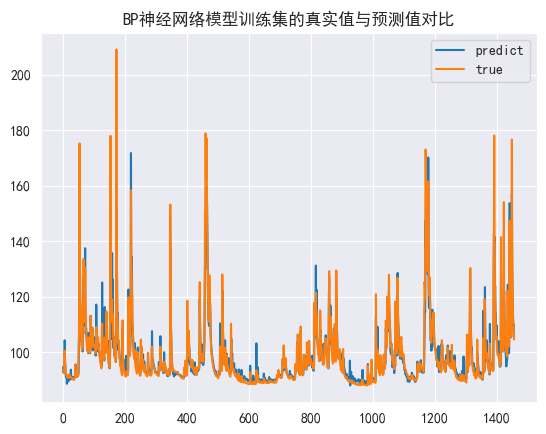

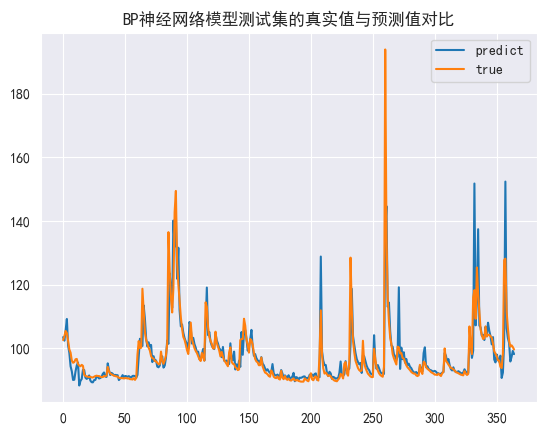

In [17]:
import pandas as pd
from utils.data_process import Z_score, add_5days_before, reverse_min_max, reverse_Z_score
from utils.feature_select import Feature_Select
from Discharge_predict import Discharge_Predict, get_best_model

ignore_warning = True
if ignore_warning:
    import warnings
    warnings.filterwarnings("ignore")
    
# mode分为"网格搜索"和"最优解结果"两种
mode = "最优解结果"

if mode == "最优解结果":
    data = pd.read_csv("./data/01333000.csv")
    data = data.drop("Swe", axis=1)
    data = add_5days_before(data)
    data, origin_mean, origin_std = Z_score(data)
    selector = Feature_Select()
    result = selector.SVM2nfeature(data, n=5)
    
    discharge_predict = Discharge_Predict(data, result, reverse_method=reverse_min_max, reverse_param=(origin_mean, origin_std))
    discharge_predict.BPNN_Discharge(learning_rate_init=0.01, is_save=False)
    # discharge_predict.SVM_Discharge(C=1, gamma='scale', tol=0.001)

elif mode == "网格搜索":
    import time
    print("开始时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
    data = pd.read_csv("./data/01333000.csv")
    data = data.drop("Swe", axis=1)
    get_best_model(data, cv=3, feature_num=5, is_reverse=False)
    print("结束时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
    
else:
    raise ValueError("mode参数错误")


## 四、流域聚类
#### 我们完成了三种流域聚类方法，分别是：
- K-means
- DBSCAN
- 层次聚类
#### 最终我们选择了K-means聚类方法，使用肘部法则选择最佳的聚类数目。

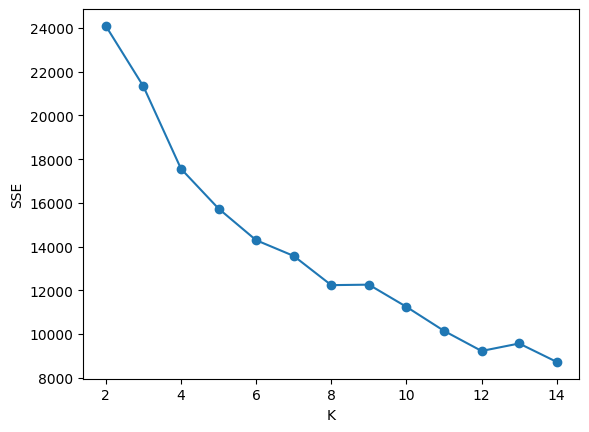

最优聚类数量为:  8


In [2]:
from utils.Basin_Clustering import Basin_Clustering
bc = Basin_Clustering("./data/dataset02", Normalize_func="Z_score", is_PCA=True)
# 肘部法则确定最优聚类数量
bc.elbow_method(n_components=5, max_k=15)
print("最优聚类数量为: ", 8)

In [7]:
from utils.Basin_Clustering import Basin_Clustering
import json
bc = Basin_Clustering("./data/dataset02", Normalize_func="Z_score", is_PCA=True)
bc.fit(n_components=5, n_clusters=8)
cluster_dict = bc.genorate_Clustering_dict()
cluster_dict = sorted(cluster_dict.items(), key=lambda x: x[0])
with open("./data/cluster_result.json", "w") as f:
    json.dump(cluster_dict, f)
for i in cluster_dict:
    print("第{}类有{}个流域，分别是{}".format(i[0], len(i[1]), i[1]))
for i in bc.Clustering_result.keys():
    print("流域{}属于第{}类".format(i, bc.Clustering_result[i]))

第0类有8个流域，分别是['01350000.csv', '01413500.csv', '01423000.csv', '01510000.csv', '01532000.csv', '01539000.csv', '01543000.csv', '01550000.csv']
第1类有14个流域，分别是['01605500.csv', '01620500.csv', '01632000.csv', '01632900.csv', '01666500.csv', '02011400.csv', '02011460.csv', '02013000.csv', '02014000.csv', '02015700.csv', '02017500.csv', '02027000.csv', '02027500.csv', '02028500.csv']
第2类有10个流域，分别是['01439500.csv', '01440000.csv', '01440400.csv', '01451800.csv', '01544500.csv', '01545600.csv', '01547700.csv', '01549500.csv', '01552500.csv', '01557500.csv']
第3类有6个流域，分别是['01606500.csv', '01644000.csv', '01664000.csv', '01667500.csv', '02016000.csv', '02018000.csv']
第4类有3个流域，分别是['01543500.csv', '01548500.csv', '01552000.csv']
第5类有8个流域，分别是['01484100.csv', '01485500.csv', '01486000.csv', '01487000.csv', '01658500.csv', '01669000.csv', '01669520.csv', '02038850.csv']
第6类有15个流域，分别是['01411300.csv', '01466500.csv', '01491000.csv', '01567500.csv', '01568000.csv', '01580000.csv', '01583500.csv', '01586610.

## 五、空间多尺度建模

### 1. 分区建模，模型选择

In [3]:
from utils.data_process import read_from_list
from Discharge_predict import get_best_model
import json
import os
import time
ignore_warning = True
if ignore_warning:
    import warnings
    warnings.filterwarnings("ignore")
if os.path.exists("./data/cluster_result.json"):
    with open("./data/cluster_result.json", "r") as f:
        cluster_dict = json.load(f)
else:
    from utils.Basin_Clustering import Basin_Clustering
    bc = Basin_Clustering("./data/dataset02", Normalize_func="Z_score", is_PCA=True)
    bc.fit(n_components=5, n_clusters=8)
    cluster_dict = bc.genorate_Clustering_dict()
    cluster_dict = {int(k): v for k, v in cluster_dict.items()}
    # cluster_dict = sorted(cluster_dict.items(), key=lambda x: x[0])
    print(cluster_dict)
    with open("./data/cluster_result.json", "w") as f:
        json.dump(cluster_dict, f)
print("开始多尺度建模，当前时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
for i in map(str, range(len(cluster_dict))):
    print("正在进行第{}类的预测，当前时间：{}".format(i, time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
    if not os.path.exists("./data/cluster/cluster_{}.csv".format(i)):
        if not os.path.exists("./data/cluster"):
            os.makedirs("./data/cluster")
        data = read_from_list(data_root="./data/dataset02",data_list=cluster_dict[i])
        # 数据保存到./data/cluster/cluser_{i}.csv
        data.to_csv(f"./data/cluster/cluster_{i}.csv", index=False)
    else:
        data = pd.read_csv(f"./data/cluster/cluster_{i}.csv")

    get_best_model(data, cv=3, feature_num=5, is_reverse=True, is_data_raw=False, model_save_path="./model/cluster_{}/".format(i), simple_mode=True, max_iter=3000, score_func="R2")
print("结束多尺度建模，当前时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
    

开始多尺度建模，当前时间: 2024-05-13 23:37:31
正在进行第0类的预测，当前时间：2024-05-13 23:37:31
----------正在进行基于Z_score归一化方法、皮尔逊相关系数法特征选择方法、SVM模型的网格搜索交叉验证----------
归一化方法：Z_score，特征选择方法：皮尔逊相关系数法，特征数：5，模型：SVM，测试集R2：0.4371976371240409
----------正在进行基于Z_score归一化方法、皮尔逊相关系数法特征选择方法、BP神经网络模型的网格搜索交叉验证----------
归一化方法：Z_score，特征选择方法：皮尔逊相关系数法，特征数：5，模型：BP神经网络，测试集R2：0.8520038326965825
----------正在进行基于Z_score归一化方法、SVM法特征选择方法、SVM模型的网格搜索交叉验证----------
归一化方法：Z_score，特征选择方法：SVM法，特征数：5，模型：SVM，测试集R2：0.4118519364750094
----------正在进行基于Z_score归一化方法、SVM法特征选择方法、BP神经网络模型的网格搜索交叉验证----------
归一化方法：Z_score，特征选择方法：SVM法，特征数：5，模型：BP神经网络，测试集R2：0.5962159490286334
----------正在进行基于min_max归一化方法、皮尔逊相关系数法特征选择方法、SVM模型的网格搜索交叉验证----------
归一化方法：min_max，特征选择方法：皮尔逊相关系数法，特征数：5，模型：SVM，测试集R2：0.27954738556936065
----------正在进行基于min_max归一化方法、皮尔逊相关系数法特征选择方法、BP神经网络模型的网格搜索交叉验证----------
归一化方法：min_max，特征选择方法：皮尔逊相关系数法，特征数：5，模型：BP神经网络，测试集R2：0.6672519331294857
----------正在进行基于min_max归一化方法、SVM法特征选择方法、SVM模型的网格搜索交叉验证----------
归一化方法：min_max，特征选择方法：SVM法，特征数：5，模型：SVM，测

#### 依据代码结果
- 第0类的最优模型是BPNN，最优特征选择方法是皮尔逊相关系数法，最优特征归一化方法是Z-score归一化
- 第1类的最优模型是BPNN，最优特征选择方法是皮尔逊相关系数法，最优特征归一化方法是Z-score归一化
- 第2类的最优模型是BPNN，最优特征选择方法是SVM法，最优特征归一化方法是min-max归一化
- 第3类的最优模型是BPNN，最优特征选择方法是皮尔逊相关系数法，最优特征归一化方法是Z-score归一化
- 第4类的最优模型是BPNN，最优特征选择方法是SVM法，最优特征归一化方法是Z-score归一化
- 第5类的最优模型是BPNN，最优特征选择方法是皮尔逊相关系数法，最优特征归一化方法是Z-score归一化
- 第6类的最优模型是BPNN，最优特征选择方法是SVM法，最优特征归一化方法是Z-score归一化
- 第7类的最优模型是BPNN，最优特征选择方法是皮尔逊相关系数法，最优特征归一化方法是Z-score归一化


### 2. 各分区网格搜索调参

In [1]:
from utils.data_process import read_from_list
import json
import os
import time
from utils.data_process import Z_score, min_max, reverse_Z_score, reverse_min_max
from utils.feature_select import Feature_Select
from Discharge_predict import Discharge_Predict
from sklearn.metrics import mean_squared_error, r2_score

model_param_best = {
    "0": ("BP神经网络", "皮尔逊相关系数法", "Z-score归一化"),
    "1": ("BP神经网络", "皮尔逊相关系数法", "Z-score归一化"),
    "2": ("BP神经网络", "SVM法", "min-max归一化"),
    "3": ("BP神经网络", "皮尔逊相关系数法", "Z-score归一化"),
    "4": ("BP神经网络", "SVM法", "Z-score归一化"),
    "5": ("BP神经网络", "皮尔逊相关系数法", "Z-score归一化"),
    "6": ("BP神经网络", "SVM法", "Z-score归一化"),
    "7": ("BP神经网络", "皮尔逊相关系数法", "Z-score归一化")
}

best_model_param_for_cluster = {i: {"model": model_param_best[i][0], "feature_select": model_param_best[i][1], "normalize": model_param_best[i][2]} for i in model_param_best.keys()}

Nomalize_func = {
    "Z-score归一化": Z_score,
    "min-max归一化": min_max,
}

reverse_func = {
    "Z-score归一化": reverse_Z_score,
    "min-max归一化": reverse_min_max,
}

ignore_warning = True
if ignore_warning:
    import warnings
    warnings.filterwarnings("ignore")
if os.path.exists("./data/cluster_result.json"):
    with open("./data/cluster_result.json", "r") as f:
        cluster_dict = json.load(f)
else:
    from utils.Basin_Clustering import Basin_Clustering
    bc = Basin_Clustering("./data/dataset02", Normalize_func="Z_score", is_PCA=True)
    bc.fit(n_components=5, n_clusters=8)
    cluster_dict = bc.genorate_Clustering_dict()
    cluster_dict = {int(k): v for k, v in cluster_dict.items()}
    # cluster_dict = sorted(cluster_dict.items(), key=lambda x: x[0])
    print(cluster_dict)
    with open("./data/cluster_result.json", "w") as f:
        json.dump(cluster_dict, f)
print("开始多尺度建模，当前时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
y_test_list = []
y_pred_list = []
for i in map(str, range(len(cluster_dict))):
    print("正在进行第{}类的预测，当前时间：{}".format(i, time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
    if not os.path.exists("./data/cluster/cluster_{}.csv".format(i)):
        if not os.path.exists("./data/cluster"):
            os.makedirs("./data/cluster")
        data = read_from_list(data_root="./data/dataset02",data_list=cluster_dict[i])
        # 数据保存到./data/cluster/cluser_{i}.csv
        data.to_csv(f"./data/cluster/cluster_{i}.csv", index=False)
    else:
        data = pd.read_csv(f"./data/cluster/cluster_{i}.csv")
    
    data, origin_param1, origin_param2 = Nomalize_func[model_param_best[i][2]](data)
    selector = Feature_Select()
    if model_param_best[i][1] == "皮尔逊相关系数法":
        result = selector.Pearson_Correlation2nfeature(data, n=5)
    elif model_param_best[i][1] == "SVM法":
        result = selector.SVM2nfeature(data, n=5)
    else:
        raise ValueError("特征选择方法错误")
        
    discharge_predict = Discharge_Predict(data, result, reverse_method=reverse_func[model_param_best[i][2]], reverse_param=(origin_param1, origin_param2))
    score_ = discharge_predict.Grid_search_CV(model_name=model_param_best[i][0], cv=3, is_visual=False, max_iter=30, score_func="R2")
    print("第{}类的R2得分为: {}".format(i, score_))
    
    y_test_list.extend(discharge_predict.y_test_reverse.tolist())
    y_pred_list.extend(discharge_predict.y_test_predict.tolist())
    
    best_model_param_for_cluster[i].update(discharge_predict.best_params)
    
print("结束多尺度建模，当前时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
print("多尺度建模的R2得分为: ", r2_score(y_test_list, y_pred_list))
print("多尺度建模的均方误差为: ", mean_squared_error(y_test_list, y_pred_list))

import json
with open("./data/best_model_param_for_cluster.json", "w") as f:
    json.dump(best_model_param_for_cluster, f)
    

开始多尺度建模，当前时间: 2024-05-14 14:38:38
正在进行第0类的预测，当前时间：2024-05-14 14:38:38
BP神经网络的最优参数：{'activation': 'tanh', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate_init': 0.01, 'solver': 'sgd'}
正在进行第1类的预测，当前时间：2024-05-14 14:42:33
BP神经网络的最优参数：{'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate_init': 0.001, 'solver': 'adam'}
正在进行第2类的预测，当前时间：2024-05-14 14:53:02
BP神经网络的最优参数：{'activation': 'relu', 'hidden_layer_sizes': (150, 150, 150), 'learning_rate_init': 0.001, 'solver': 'adam'}
正在进行第3类的预测，当前时间：2024-05-14 15:00:18
BP神经网络的最优参数：{'activation': 'logistic', 'hidden_layer_sizes': (150, 150, 150), 'learning_rate_init': 0.001, 'solver': 'adam'}
正在进行第4类的预测，当前时间：2024-05-14 15:11:48
BP神经网络的最优参数：{'activation': 'relu', 'hidden_layer_sizes': (150, 150, 150), 'learning_rate_init': 0.01, 'solver': 'sgd'}
正在进行第5类的预测，当前时间：2024-05-14 15:16:28
BP神经网络的最优参数：{'activation': 'relu', 'hidden_layer_sizes': (150, 150, 150), 'learning_rate_init': 0.01, 'solver': 'adam'}
正在进行第6类的预测，当前时间：2024-05-1

### 3. 各分区模型结果

{'0': {'model': 'BP神经网络', 'feature_select': '皮尔逊相关系数法', 'normalize': 'Z-score归一化', 'activation': 'tanh', 'solver': 'sgd', 'hidden_layer_sizes': [100, 100, 100], 'learning_rate_init': 0.01}, '1': {'model': 'BP神经网络', 'feature_select': '皮尔逊相关系数法', 'normalize': 'Z-score归一化', 'activation': 'relu', 'solver': 'adam', 'hidden_layer_sizes': [100, 100, 100], 'learning_rate_init': 0.001}, '2': {'model': 'BP神经网络', 'feature_select': 'SVM法', 'normalize': 'min-max归一化', 'activation': 'relu', 'solver': 'adam', 'hidden_layer_sizes': [150, 150, 150], 'learning_rate_init': 0.001}, '3': {'model': 'BP神经网络', 'feature_select': '皮尔逊相关系数法', 'normalize': 'Z-score归一化', 'activation': 'logistic', 'solver': 'adam', 'hidden_layer_sizes': [150, 150, 150], 'learning_rate_init': 0.001}, '4': {'model': 'BP神经网络', 'feature_select': 'SVM法', 'normalize': 'Z-score归一化', 'activation': 'relu', 'solver': 'sgd', 'hidden_layer_sizes': [150, 150, 150], 'learning_rate_init': 0.01}, '5': {'model': 'BP神经网络', 'feature_select': '皮尔逊相关系数法

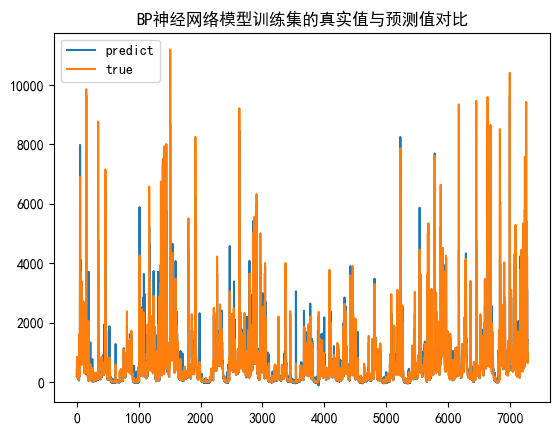

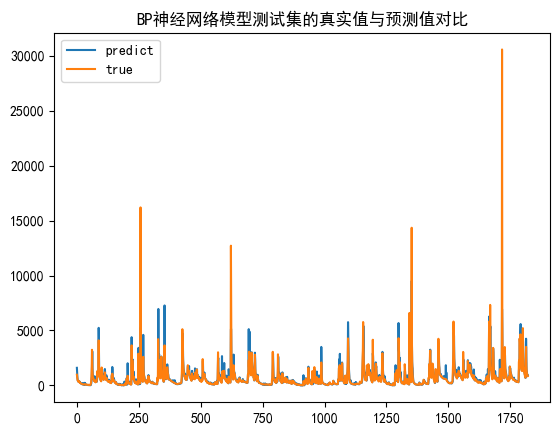

第0类的R2得分为: 0.6161956711801835
正在进行第1类的预测，当前时间：2024-05-14 16:47:26
第1类流域的分类可视化如图所示：
--------------------BP神经网络模型评估--------------------
使用特征： ['one_Discharge', 'Prcp', 'two_Discharge', 'three_Discharge', 'four_Discharge']
训练集均方误差： 18572.000946931974
训练集R2： 0.7540254474379905
测试集均方误差： 38634.50591915931
测试集R2： 0.4991394826546136
--------------------------------------------------


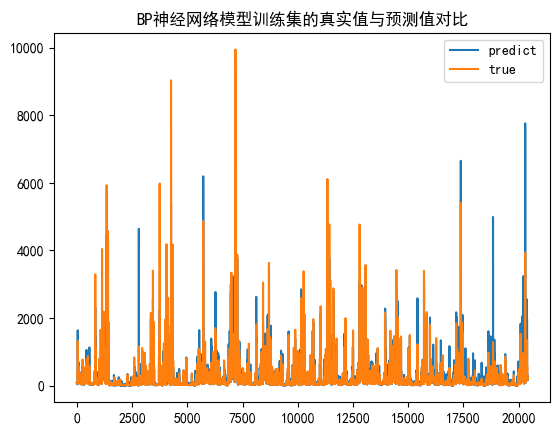

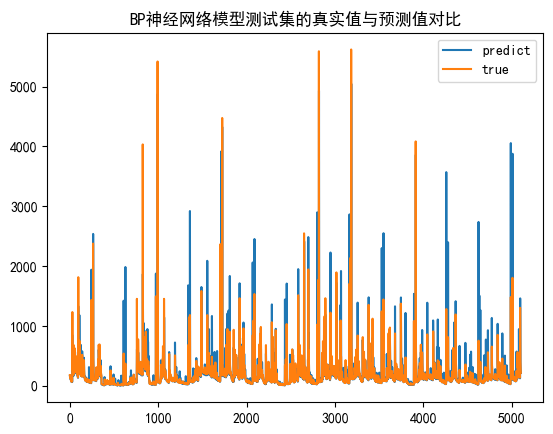

第1类的R2得分为: 0.4991394826546136
正在进行第2类的预测，当前时间：2024-05-14 16:47:35
第2类流域的分类可视化如图所示：
--------------------BP神经网络模型评估--------------------
使用特征： ['one_Discharge', 'Prcp', 'Tmin', 'Vp', 'one_Prcp']
训练集均方误差： 6434.541689764388
训练集R2： 0.7174165308252627
测试集均方误差： 14994.365664459552
测试集R2： 0.6527003913486548
--------------------------------------------------


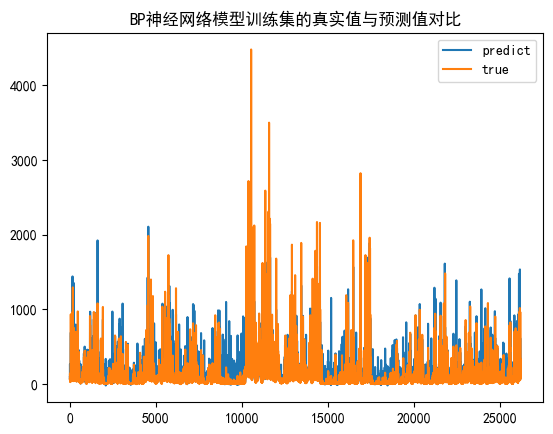

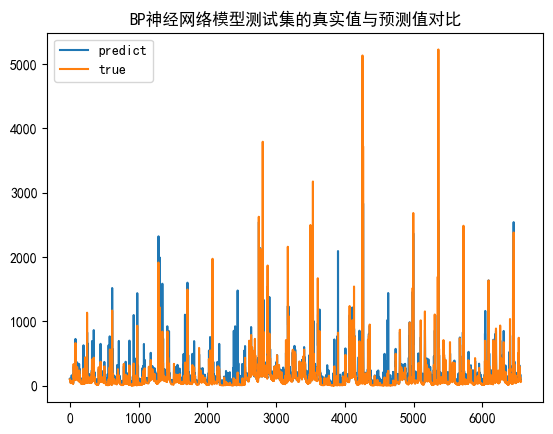

第2类的R2得分为: 0.6527003913486548
正在进行第3类的预测，当前时间：2024-05-14 16:47:40
第3类流域的分类可视化如图所示：
--------------------BP神经网络模型评估--------------------
使用特征： ['one_Discharge', 'two_Discharge', 'three_Discharge', 'four_Discharge', 'Prcp']
训练集均方误差： 6223.222868953133
训练集R2： 0.7145113714138354
测试集均方误差： 11253.378241262692
测试集R2： 0.4490963674808168
--------------------------------------------------


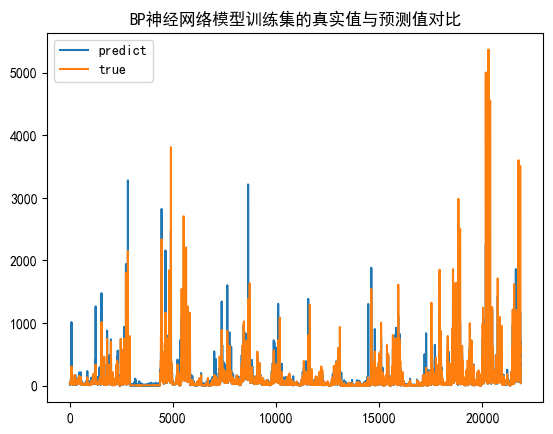

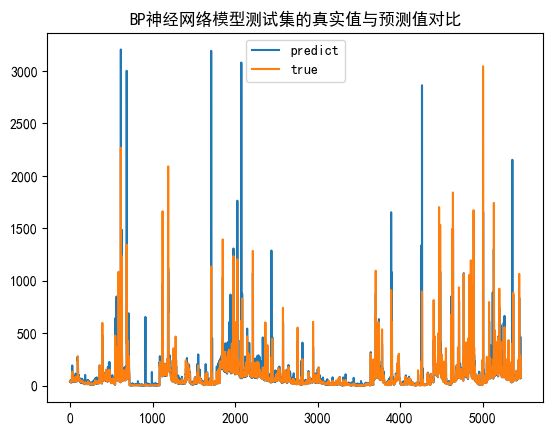

第3类的R2得分为: 0.4490963674808168
正在进行第4类的预测，当前时间：2024-05-14 16:49:11
第4类流域的分类可视化如图所示：
--------------------BP神经网络模型评估--------------------
使用特征： ['one_Discharge', 'Prcp', 'Tmin', 'Tmax', 'Srad']
训练集均方误差： 137688.93907383602
训练集R2： 0.8500497120392639
测试集均方误差： 199888.8591050777
测试集R2： 0.7430299003954448
--------------------------------------------------


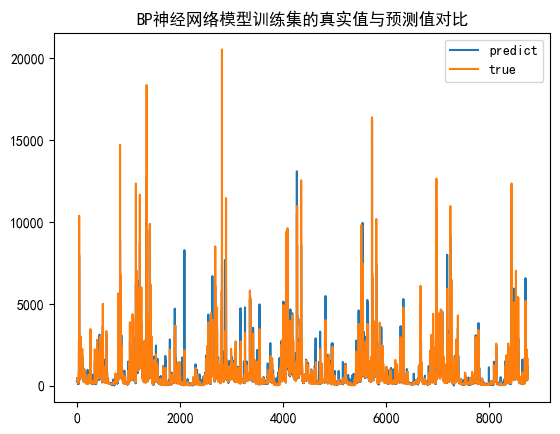

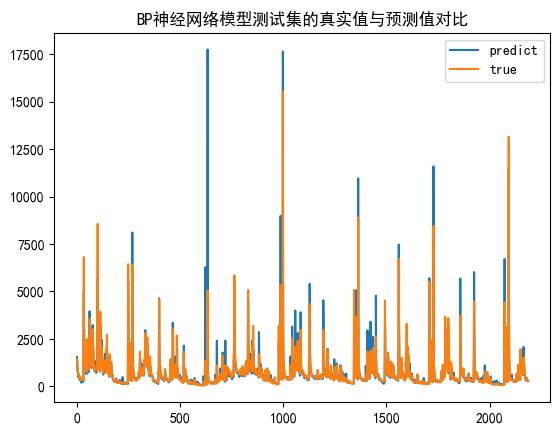

第4类的R2得分为: 0.7430299003954448
正在进行第5类的预测，当前时间：2024-05-14 16:49:27
第5类流域的分类可视化如图所示：
--------------------BP神经网络模型评估--------------------
使用特征： ['one_Discharge', 'two_Discharge', 'three_Discharge', 'four_Discharge', 'five_Discharge']
训练集均方误差： 1109.309936680291
训练集R2： 0.8922547701310499
测试集均方误差： 2872.6871727795674
测试集R2： 0.8346867786208101
--------------------------------------------------


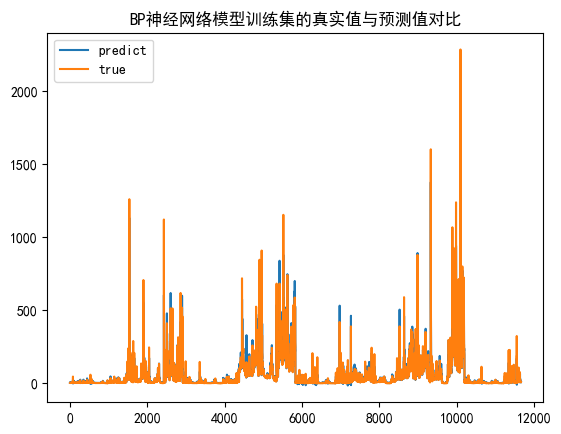

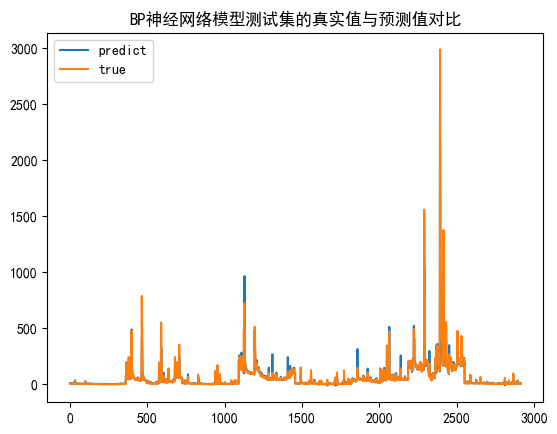

第5类的R2得分为: 0.8346867786208101
正在进行第6类的预测，当前时间：2024-05-14 16:49:38
第6类流域的分类可视化如图所示：
--------------------BP神经网络模型评估--------------------
使用特征： ['one_Discharge', 'Prcp', 'Tmin', 'two_Discharge', 'Tmax']
训练集均方误差： 102984.68765577857
训练集R2： 0.9620255125057113
测试集均方误差： 2110616.318407628
测试集R2： 0.7803268364337044
--------------------------------------------------


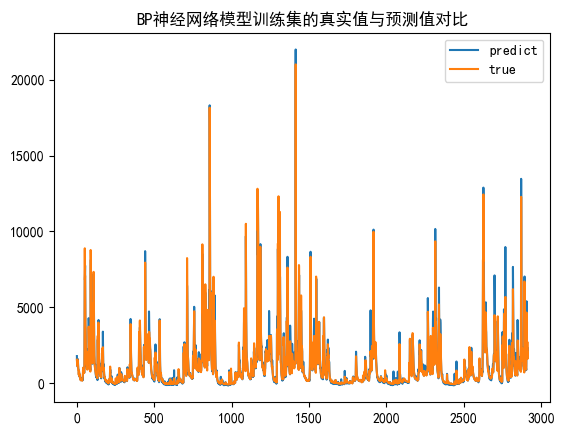

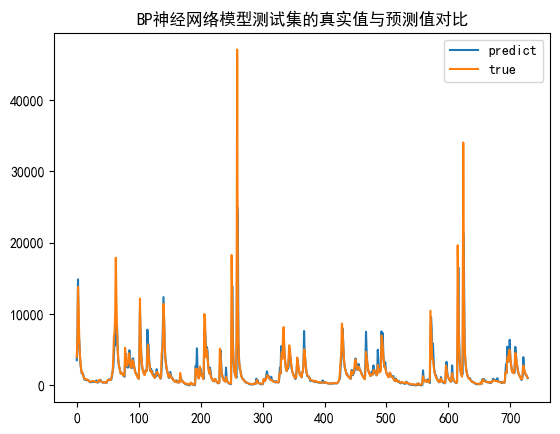

第6类的R2得分为: 0.7803268364337044
正在进行第7类的预测，当前时间：2024-05-14 16:49:43
第7类流域的分类可视化如图所示：
--------------------BP神经网络模型评估--------------------
使用特征： ['one_Discharge', 'Prcp', 'two_Discharge', 'three_Discharge', 'four_Discharge']
训练集均方误差： 39657.73673155975
训练集R2： 0.8407815626326206
测试集均方误差： 110312.53180261377
测试集R2： 0.7957485096599688
--------------------------------------------------


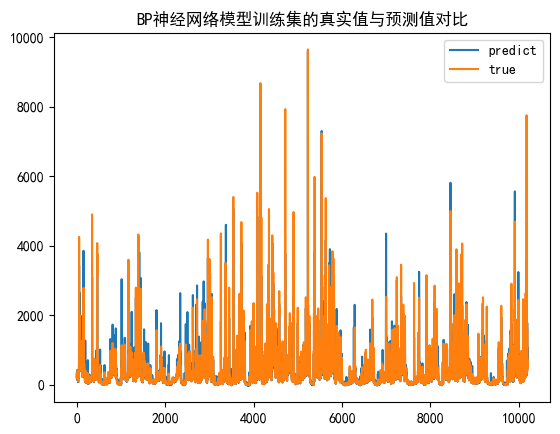

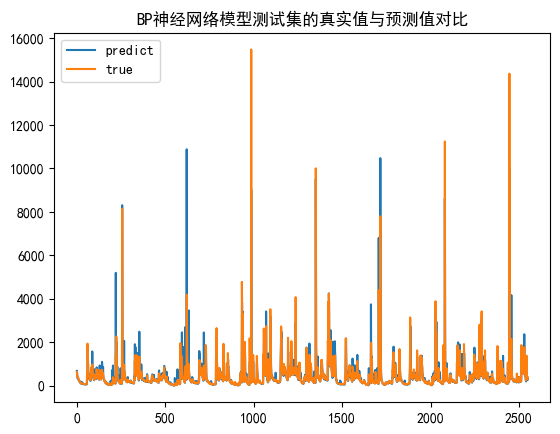

第7类的R2得分为: 0.7957485096599688
结束多尺度建模，当前时间: 2024-05-14 16:49:52
多尺度建模的R2得分为:  0.7836984942710732
多尺度建模的均方误差为:  133011.80864833653


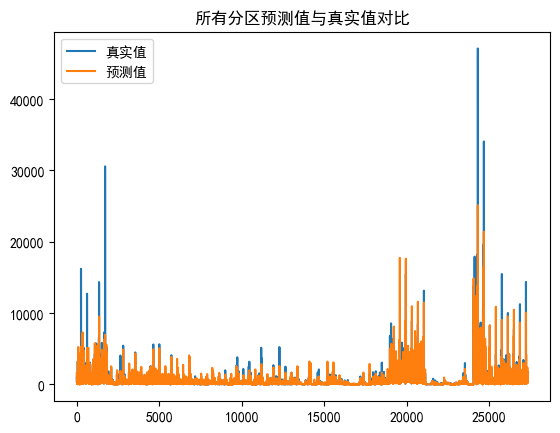

In [4]:
import json
# 读取多尺度建模的最优参数
with open("./data/best_model_param_for_cluster.json", "r") as f:
    best_model_param_for_cluster = json.load(f)

Nomalize_func = {
    "Z-score归一化": Z_score,
    "min-max归一化": min_max,
}

reverse_func = {
    "Z-score归一化": reverse_Z_score,
    "min-max归一化": reverse_min_max,
}

ignore_warning = True
if ignore_warning:
    import warnings
    warnings.filterwarnings("ignore")
if os.path.exists("./data/cluster_result.json"):
    with open("./data/cluster_result.json", "r") as f:
        cluster_dict = json.load(f)
else:
    from utils.Basin_Clustering import Basin_Clustering
    bc = Basin_Clustering("./data/dataset02", Normalize_func="Z_score", is_PCA=True)
    bc.fit(n_components=5, n_clusters=8)
    cluster_dict = bc.genorate_Clustering_dict()
    cluster_dict = {int(k): v for k, v in cluster_dict.items()}
    # cluster_dict = sorted(cluster_dict.items(), key=lambda x: x[0])
    print(cluster_dict)
    with open("./data/cluster_result.json", "w") as f:
        json.dump(cluster_dict, f)
print("开始多尺度建模，当前时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
y_test_list = []
y_pred_list = []
for i in map(str, range(len(cluster_dict))):
    print("正在进行第{}类的预测，当前时间：{}".format(i, time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
    if not os.path.exists("./data/cluster/cluster_{}.csv".format(i)):
        if not os.path.exists("./data/cluster"):
            os.makedirs("./data/cluster")
        data = read_from_list(data_root="./data/dataset02",data_list=cluster_dict[i])
        # 数据保存到./data/cluster/cluser_{i}.csv
        data.to_csv(f"./data/cluster/cluster_{i}.csv", index=False)
    else:
        data = pd.read_csv(f"./data/cluster/cluster_{i}.csv")
    
    data, origin_param1, origin_param2 = Nomalize_func[best_model_param_for_cluster[i]["normalize"]](data)
    selector = Feature_Select()
    if best_model_param_for_cluster[i]["feature_select"] == "皮尔逊相关系数法":
        result = selector.Pearson_Correlation2nfeature(data, n=5)
    elif best_model_param_for_cluster[i]["feature_select"] == "SVM法":
        result = selector.SVM2nfeature(data, n=5)
    else:
        raise ValueError("特征选择方法错误")
        
    discharge_predict = Discharge_Predict(data, result, reverse_method=reverse_func[best_model_param_for_cluster[i]["normalize"]], reverse_param=(origin_param1, origin_param2))
    print(f"第{i}类流域的分类可视化如图所示：")
    if best_model_param_for_cluster[i]["model"] == "BP神经网络":
        score_ = discharge_predict.BPNN_Discharge(hidden_layer_sizes=best_model_param_for_cluster[i]["hidden_layer_sizes"], learning_rate_init=best_model_param_for_cluster[i]["learning_rate_init"], max_iter=3000, activation=best_model_param_for_cluster[i]["activation"], solver=best_model_param_for_cluster[i]["solver"], score_func="R2", is_visual=True, is_save=False)
    elif best_model_param_for_cluster[i]["model"] == "支持向量回归":
        score_ = discharge_predict.SVM_Discharge(kernel=best_model_param_for_cluster[i]["kernel"], C=best_model_param_for_cluster[i]["C"], gamma=best_model_param_for_cluster[i]["gamma"], tol=best_model_param_for_cluster[i]["tol"], score_func="R2", is_visual=True, max_iter=3000, is_save=False)
    else:
        raise ValueError("模型选择错误")
    
    print("第{}类的R2得分为: {}".format(i, score_))
    
    y_test_list.extend(discharge_predict.y_test_reverse.tolist())
    y_pred_list.extend(discharge_predict.y_test_predict.tolist())
    
print("结束多尺度建模，当前时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
print("多尺度建模的R2得分为: ", r2_score(y_test_list, y_pred_list))
print("多尺度建模的均方误差为: ", mean_squared_error(y_test_list, y_pred_list))

# 可视化
import matplotlib.pyplot as plt
plt.title("所有分区预测值与真实值对比")
plt.plot(y_test_list, label="真实值")
plt.plot(y_pred_list, label="预测值")
plt.legend()
plt.savefig("./result/所有分区预测值与真实值对比.png")
plt.show()

### 4. 全区建模，模型选择

In [1]:
from utils.data_process import read_from_list
from Discharge_predict import get_best_model
import json
import os
import time
ignore_warning = True
if ignore_warning:
    import warnings
    warnings.filterwarnings("ignore")

print("开始全区建模查找最优模型组合，当前时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))

if not os.path.exists("./data/cluster/cluster_all.csv"):
    if not os.path.exists("./data/cluster"):
        os.makedirs("./data/cluster")
    data = read_from_list(data_root="./data/dataset02",data_list=os.listdir("./data/dataset02"))
    data.to_csv(f"./data/cluster/cluster_all.csv", index=False)
else:
    data = pd.read_csv(f"./data/cluster/cluster_all.csv")

get_best_model(data, cv=3, feature_num=5, is_reverse=True, is_data_raw=False, model_save_path="./model/cluster_all/", simple_mode=True, max_iter=3000, score_func="R2")
print("结束多尺度建模查找最优模型组合，当前时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))

开始全区建模查找最优模型组合，当前时间: 2024-05-14 17:27:29
数据量过大，采用其中随机20%数据进行特征选择
----------正在进行基于Z_score归一化方法、皮尔逊相关系数法特征选择方法、SVM模型的网格搜索交叉验证----------
归一化方法：Z_score，特征选择方法：皮尔逊相关系数法，特征数：5，模型：SVM，测试集R2：-1.0311309652043685
----------正在进行基于Z_score归一化方法、皮尔逊相关系数法特征选择方法、BP神经网络模型的网格搜索交叉验证----------
归一化方法：Z_score，特征选择方法：皮尔逊相关系数法，特征数：5，模型：BP神经网络，测试集R2：0.5146149535422693
----------正在进行基于Z_score归一化方法、SVM法特征选择方法、SVM模型的网格搜索交叉验证----------
归一化方法：Z_score，特征选择方法：SVM法，特征数：5，模型：SVM，测试集R2：0.4172128733576844
----------正在进行基于Z_score归一化方法、SVM法特征选择方法、BP神经网络模型的网格搜索交叉验证----------
归一化方法：Z_score，特征选择方法：SVM法，特征数：5，模型：BP神经网络，测试集R2：0.6648580535851427
数据量过大，采用其中随机20%数据进行特征选择
----------正在进行基于min_max归一化方法、皮尔逊相关系数法特征选择方法、SVM模型的网格搜索交叉验证----------
归一化方法：min_max，特征选择方法：皮尔逊相关系数法，特征数：5，模型：SVM，测试集R2：-7.0668366140252274
----------正在进行基于min_max归一化方法、皮尔逊相关系数法特征选择方法、BP神经网络模型的网格搜索交叉验证----------
归一化方法：min_max，特征选择方法：皮尔逊相关系数法，特征数：5，模型：BP神经网络，测试集R2：0.423091724141179
----------正在进行基于min_max归一化方法、SVM法特征选择方法、SVM模型的网格搜索交叉验证----------
归一化方法：min_max，特征选择方法：

#### 依据代码结果
- 全区的最优模型是BPNN，最优特征选择方法是SVM法，最优特征归一化方法是Z-score归一化

### 5. 全区网格搜索调参

In [1]:
from utils.data_process import read_from_list
import os
import time
from utils.data_process import Z_score, reverse_Z_score
from utils.feature_select import Feature_Select
from Discharge_predict import Discharge_Predict

ignore_warning = True
if ignore_warning:
    import warnings
    warnings.filterwarnings("ignore")
print("开始全区建模，当前时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))

if not os.path.exists("./data/cluster/cluster_all.csv"):
    if not os.path.exists("./data/cluster"):
        os.makedirs("./data/cluster")
    data = read_from_list(data_root="./data/dataset02",data_list=os.listdir("./data/dataset02"))
    data.to_csv(f"./data/cluster/cluster_all.csv", index=False)
else:
    data = pd.read_csv(f"./data/cluster/cluster_all.csv")

data, origin_param1, origin_param2 = Z_score(data)
selector = Feature_Select()
result = selector.SVM2nfeature(data.sample(frac=0.5), n=5)
print("开始网格搜索调参，当前时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
discharge_predict = Discharge_Predict(data, result, reverse_method=reverse_Z_score, reverse_param=(origin_param1, origin_param2))
score_ = discharge_predict.Grid_search_CV(model_name="BP神经网络", cv=3, is_visual=False, max_iter=30, score_func="R2", verbose=2)
print("全区的R2得分为: {}".format(score_))
    
print("结束全区建模，当前时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))

开始全区建模，当前时间: 2024-05-14 19:08:20
开始网格搜索调参，当前时间: 2024-05-14 19:14:43
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END activation=relu, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam; total time=  16.6s
[CV] END activation=relu, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam; total time=  16.4s
[CV] END activation=relu, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam; total time=  16.3s
[CV] END activation=relu, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd; total time=  16.3s
[CV] END activation=relu, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd; total time=  16.3s
[CV] END activation=relu, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd; total time=  16.4s
[CV] END activation=relu, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=  16.0s
[CV] END activation=relu, hidden_l

### 6. 全区模型结果
- 最优模型为BP神经网络，最优特征选择方法为SVM法，最优特征归一化方法为Z-score归一化，最优参数为{'activation': 'relu', 'hidden_layer_sizes': (150, 150, 150), 'learning_rate_init': 0.01, 'solver': 'adam'}

开始全区建模，当前时间: 2024-05-14 20:22:59
存在已读取的数据，将从文件中读取
Index(['one_Discharge', 'two_Discharge', 'Tmin', 'Vp', 'Prcp'], dtype='object')
模型训练中...
--------------------BP神经网络模型评估--------------------
使用特征： ['one_Discharge', 'two_Discharge', 'Tmin', 'Vp', 'Prcp']
训练集均方误差： 49227.8460703017
训练集R2： 0.8347154491794939
测试集均方误差： 151326.87158976623
测试集R2： 0.7288893465986952
--------------------------------------------------


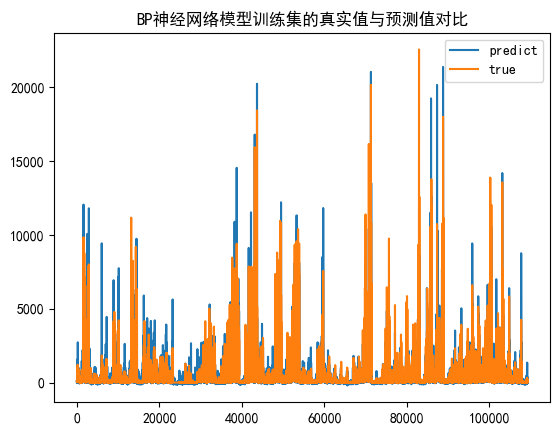

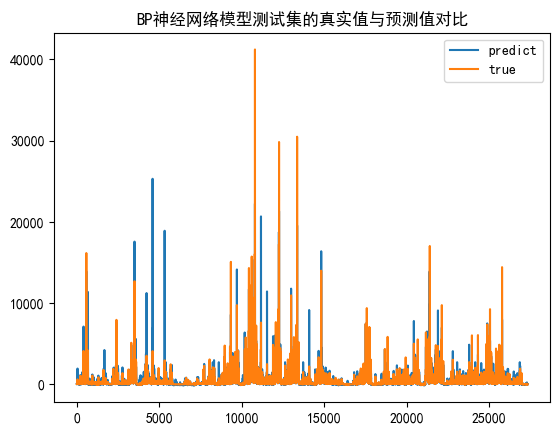

In [1]:
from utils.data_process import Z_score, reverse_Z_score, read_from_list
from utils.feature_select import Feature_Select
from Discharge_predict import Discharge_Predict
import time
import os
import pandas as pd

ignore_warning = True
if ignore_warning:
    import warnings
    warnings.filterwarnings("ignore")

print("开始全区建模，当前时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))

if not os.path.exists("./data/cluster/cluster_all.csv"):
    if not os.path.exists("./data/cluster"):
        os.makedirs("./data/cluster")
    data = read_from_list(data_root="./data/dataset02",data_list=os.listdir("./data/dataset02"))
    data.to_csv("./data/cluster/cluster_all.csv", index=False)
else:
    print("存在已读取的数据，将从文件中读取")
    data = pd.read_csv("./data/cluster/cluster_all.csv")
    
data, origin_param1, origin_param2 = Z_score(data)
if input("是否采用之前的特征选择结果？(y/n)") == "y":
    result = ['one_Discharge', 'two_Discharge', 'Tmin', 'Vp', 'Prcp']
else:
    selector = Feature_Select()
    result = selector.SVM2nfeature(data.sample(frac=0.5), n=5)

print("模型训练中...")
discharge_predict = Discharge_Predict(data, result, reverse_method=reverse_Z_score, reverse_param=(origin_param1, origin_param2))

score_ = discharge_predict.BPNN_Discharge(hidden_layer_sizes=(150, 150, 150), learning_rate_init=0.01, max_iter=3000, activation='relu', solver='adam', score_func="R2", is_visual=True, is_save=False)
    

#### 综上，得出结果：
- 分区建模R2:0.7836
- 全区建模R2:0.7289